In [53]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 18 11:41:59 2022
@author: Sharona
"""
# imports
import pandas as pd
import nltk
import spacy

nlp = spacy.load("en_core_web_sm")

# open training data as pandas df + add column names
train_df = pd.read_csv('c:/Users/desir/Downloads/SEM-2012-SharedTask-CD-SCO-simple.v2/SEM-2012-SharedTask-CD-SCO-dev-simple.v2.txt', sep="\t", header=None, names=["Book", "Sent nr", "Token nr", "Token", "Label"])

## Preprocessing: lowercasen

# put all our tokens into a list:
tokenlist = train_df['Token'].tolist()

# Code to extract previous token and next token:
pretoken = []
nexttoken = []

i = 0
for token in tokenlist:
    if i == 0:
        pretoken.append('<BOD>')
        nexttoken.append(tokenlist[i+1])
    elif i == len(tokenlist) - 1:
        pretoken.append(tokenlist[i-1])
        nexttoken.append('<EOD>')                
    else:
        pretoken.append(tokenlist[i-1])
        nexttoken.append(tokenlist[i+1])
    i += 1   

train_df['pretoken'] = pretoken
train_df['nexttoken'] = nexttoken

# Code for extracting POS tags with spacy:

# d = []
# for word in tokenlist:
#     doc = nlp(word)
#     poslist = []
#     for item in doc:
#         poslist.append(item.pos_)
#     d.append(poslist)
    
# newlist = []
# for item in d:
#     if len(item) > 1:
#         newlist.append(item)
#     else:
#         newlist.append(item[0])    

# train_df["POS"] = newlist
d = []
postag=nltk.pos_tag(tokenlist)
for token,tag in postag:
    d.append(tag)
    
train_df['POS']=d

# Code for extracting previous and next POS tag:



# Code for extracting the lemma, with spacy:

d = []
for word in tokenlist:
    doc = nlp(word)
    lemmalist = []
    for item in doc:
        lemmalist.append(item.lemma_)
    d.append(lemmalist)

newlist = []
for item in d:
    if len(item) > 1:
        newlist.append(item)
    else:
        newlist.append(item[0])
train_df['Lemma'] = newlist


# Code for extracting previous and next lemma: 
lemmalist_2 = train_df['Lemma']
pre_lemma = []
next_lemma = []

i = 0
for lemma in lemmalist_2:
    if i == 0:
        pre_lemma.append('<BOD>')
        next_lemma.append(lemmalist_2[i+1])
    elif i == len(lemmalist_2) - 1:
        pre_lemma.append(lemmalist_2[i-1])
        next_lemma.append('<EOD>')                
    else:
        pre_lemma.append(lemmalist_2[i-1])
        next_lemma.append(lemmalist_2[i+1])
    i += 1   

train_df['pre_lemma'] = pre_lemma
train_df['next_lemma'] = next_lemma


print(train_df.head(20))

#print partial df to check if it went well
#print(train_df.head(10))




# convert pandas df to .conll file (uncomment when ready to use)
outputfile = "SEM_dev_data_nltkPOS.conll"
train_df.to_csv(f'c:/Users/desir/Desktop/text_mining/applied TM/{outputfile}', sep='\t', header=True, quotechar='|', index=False)




          Book  Sent nr  Token nr       Token Label    pretoken   nexttoken  \
0   wisteria01        0         0          1.     O       <BOD>         The   
1   wisteria01        0         1         The     O          1.    Singular   
2   wisteria01        0         2    Singular     O         The  Experience   
3   wisteria01        0         3  Experience     O    Singular          of   
4   wisteria01        0         4          of     O  Experience         Mr.   
5   wisteria01        0         5         Mr.     O          of        John   
6   wisteria01        0         6        John     O         Mr.       Scott   
7   wisteria01        0         7       Scott     O        John      Eccles   
8   wisteria01        0         8      Eccles     O       Scott           I   
9   wisteria01        1         0           I     O      Eccles        find   
10  wisteria01        1         1        find     O           I          it   
11  wisteria01        1         2          it     O 

In [7]:
len(train_df)

65451

In [93]:
train_df.tail(10)

,Book,Sent nr,Token nr,Token,Label,pretoken,nexttoken,POS,Lemma,pre_lemma,next_lemma
13557,wisteria02,439,4,our,O,see,savage,PRON,our,see,savage
13558,wisteria02,439,5,savage,O,our,friend,NOUN,savage,our,friend
13559,wisteria02,439,6,friend,O,savage,was,NOUN,friend,savage,be
13560,wisteria02,439,7,was,O,friend,very,AUX,be,friend,very
13561,wisteria02,439,8,very,O,was,orthodox,ADV,very,be,orthodox
13562,wisteria02,439,9,orthodox,O,very,in,ADJ,orthodox,very,in
13563,wisteria02,439,10,in,O,orthodox,his,ADP,in,orthodox,his
13564,wisteria02,439,11,his,O,in,ritual,PRON,his,in,ritual
13565,wisteria02,439,12,ritual,O,his,.,ADJ,ritual,his,.
13566,wisteria02,439,13,.,O,ritual,<EOD>,PUNCT,.,ritual,<EOD>


In [54]:
# Code for extracting negation cues with their POS tag label.

df_bneg = train_df.loc[train_df['Label'] == 'B-NEG', 'POS']
#print(df_bneg)

df_ineg = train_df.loc[train_df['Label'] == 'I-NEG', 'POS']
#print(df_ineg)

# Merge the two frames together: 

frames = [df_bneg, df_ineg]
frames_new = pd.concat(frames)

print(frames_new)


55        DT
335       DT
391       RB
577       JJ
588       RB
        ... 
13496     IN
13505     JJ
4009      DT
4010     NNS
13008    RBR
Name: POS, Length: 179, dtype: object


In [55]:
# code to count the distribution of pos tags for negation cues using the combined dataframe from before:
from collections import Counter
negation_distribution = frames_new

negation_counter = Counter(negation_distribution)

print(negation_counter)

Counter({'RB': 77, 'DT': 33, 'JJ': 25, 'NN': 19, 'IN': 8, 'CC': 8, 'VBN': 2, 'UH': 2, 'NNP': 2, 'VB': 1, 'NNS': 1, 'RBR': 1})


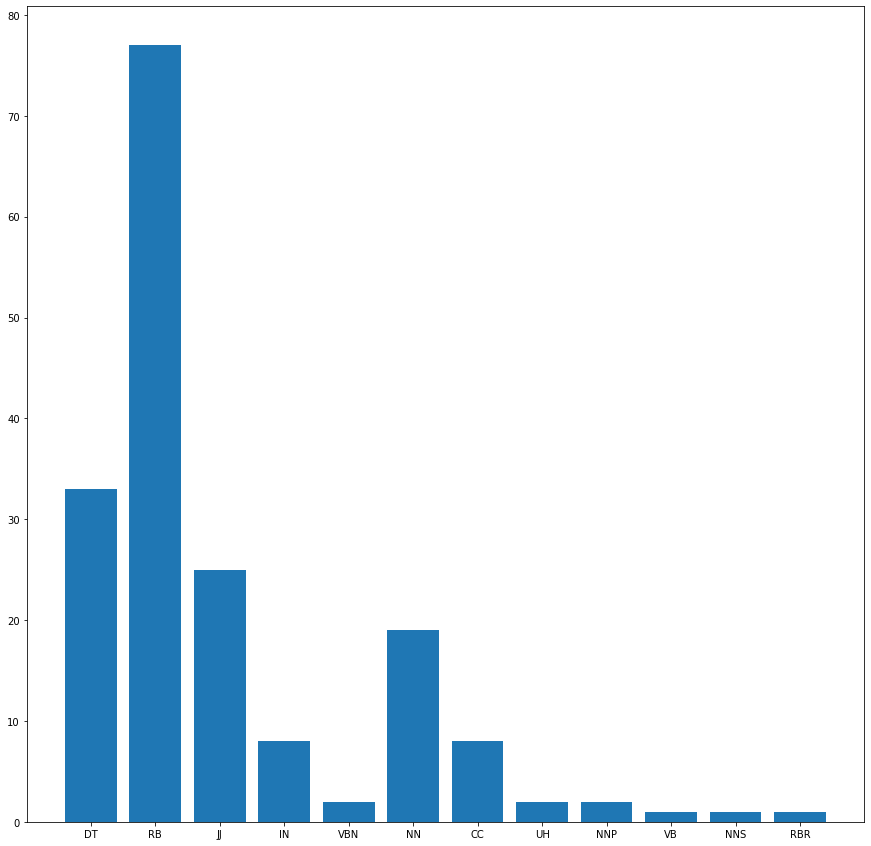

In [56]:
# code for creating a histogram:
# Don't forget to change the outfilename, otherwise the image gets overwritten by another!

import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.bar(negation_counter.keys(), negation_counter.values())
plt.savefig('c:/Users/desir/Desktop/text_mining/applied TM/distribution_pos_negation_dev.png')

In [ ]:
# Code for a data description function. 

def data_description():
    
    from collections import Counter
    
    number_tokens = []
    number_negation = []

    with open ('c:/Users/desir/Downloads/SEM-2012-SharedTask-CD-SCO-simple.v2/SEM-2012-SharedTask-CD-SCO-training-simple.v2.txt', 'r') as readfile:
    for row in readfile:
        #print(row)
        number_tokens.append(row)
    
    
    
    ## Getting the number of POS tags for the entire dataset:
    pos = train_df['POS']
    countlist = []
    for item in pos:
        if type(item) == list:
            for elem in item:
                countlist.append(elem)
        else:
            countlist.append(item)
    pos_counter = Counter(countlist)
    #print(pos_counter)

    
    
    
    ## Summary:
    print(f'This file contains {number_tokens} tokens')
    print(f'This file contains {number_negation} number of negation cues')
    
    print('The distribution of POS tags in the dataset:')
    for items in pos_counter.items():
    print(items)
    
    
    
    # inladen data
    # uitkomsten van aantal tokens etc. 

In [57]:
# code for counting POS tags in the entire dataset:
# Note that punctuations are stored in punct, which will not be counted. 

from collections import Counter
pos = train_df['POS']

punct = []
postags = []
punctlist = '''!()-[]{};:'"\,<>./?@#$%^&*``''_~'''
for postag in pos:
    #print(postag)
    if postag in punctlist:
        punct.append(postag)
    else:
        postags.append(postag)

pos_counter = Counter(postags)
print(pos_counter)
        
        
# pos_counter = Counter()
# print(pos_counter)

Counter({'NN': 1680, 'IN': 1370, 'DT': 1198, 'PRP': 1094, 'VBD': 780, 'JJ': 758, 'NNP': 592, 'RB': 545, 'CC': 425, 'VB': 416, 'PRP$': 373, 'VBN': 361, 'NNS': 327, 'TO': 257, 'VBP': 246, 'VBZ': 204, 'MD': 200, 'VBG': 104, 'CD': 82, 'WP': 75, 'WDT': 69, 'RP': 68, 'WRB': 64, 'EX': 44, 'POS': 31, 'JJR': 16, 'PDT': 16, 'UH': 13, 'JJS': 11, 'RBR': 11, 'RBS': 10, 'NNPS': 10, 'WP$': 8})


In [158]:
# display each count on a seperate line:

for items in pos_counter.items():
    print(items)

('X', 3)
('PUNCT', 2424)
('DET', 1398)
('PROPN', 504)
('NOUN', 1762)
('ADP', 1113)
('PRON', 1586)
('VERB', 1983)
('AUX', 652)
('ADJ', 685)
('CCONJ', 425)
('NUM', 96)
('SCONJ', 101)
('INTJ', 105)
('ADV', 794)
('PART', 319)


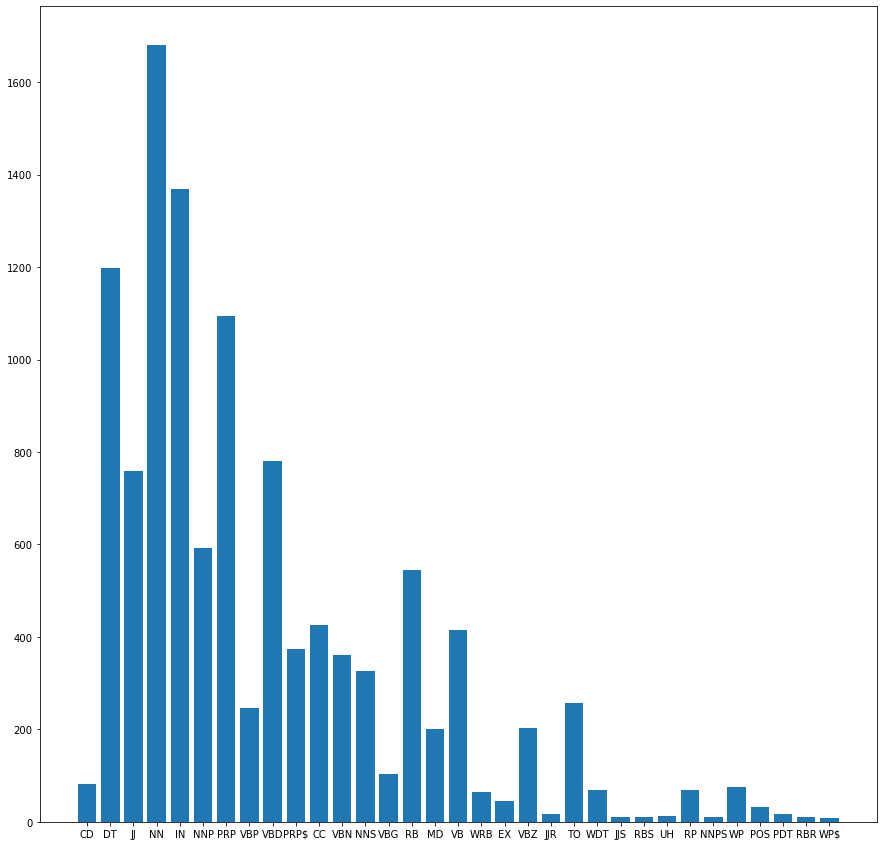

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.bar(pos_counter.keys(), pos_counter.values())
plt.savefig('c:/Users/desir/Desktop/text_mining/applied TM/distribution_pos_tokens_dev.png')

In [ ]:
from collections import Counter
pos = train_df['POS']

countlist = []

for item in pos:

    if type(item) == list:
        for elem in item:
            countlist.append(elem)
    else:
        countlist.append(item)

        
pos_counter = Counter(countlist)
print(pos_counter)